# User path setting

In [1]:
# path using \ instead of /
MagNet_Raw_Data_path = r"G:\我的云端硬盘\DeepLearning\Challenge\Challenge_Training\Material C"

# Process

In [2]:
from dataTransform import *
from Maglib import *
import os

## Defult setting

In [3]:
raw_data = Maglib.MagLoader(
    MagNet_Raw_Data_path,
    'numpy',
    'csv',
    )

newStep=128
savePath = r"data\tl_dataset"

In [4]:
#load txt data from path
with open(r"data\best_model.txt") as f:
    best_md = f.readlines()

#load best model

# remove whitespace characters like `\n` at the end of each line
best_std_path=best_md[0].strip()+r"\data\std_dataset"
std_loss_power=float(best_md[1].strip())
print(best_std_path)
print("std_loss_power: ",std_loss_power)

G:\我的云端硬盘\DeepLearning\MagNet_dataExpand_comb_shift_flip\MagNet_comb_3C94_cycle\data\std_dataset
std_loss_power:  0.9859774


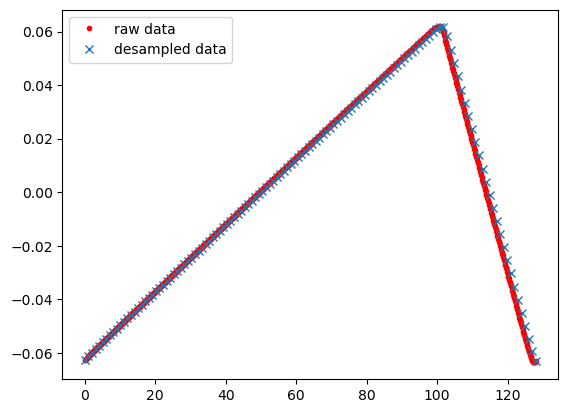

Data transform done
DataSplit done
Done
Data saved in 
g:\我的云端硬盘\DeepLearning\Challange_comb_shift_flip\MagNet_comb_modelC_cycle\data\tl_dataset


In [5]:
raw_data=dataTransform(raw_data, 
    newStep, 
    savePath, 
    best_std_path,
    std_loss_power=std_loss_power)

dataSplit(raw_data, savePath,[0.8,0.19,0.01])
print("Done")
print("Data saved in \n"+os.path.abspath(savePath))

In [6]:
import NW_LSTM
import NN_DataLoader


best_model_path=best_md[0].strip()+r"\model_colab.ckpt"
print('best_model_path: ',best_model_path)
# Check if CUDA is available and if so, set the device to GPU
device = torch.device("cpu")
print("Device using ", device)

# Instantiate the model with appropriate dimensions
model = NW_LSTM.get_global_model().to(device)

# load model from ckpt file
model.load_state_dict(torch.load(best_model_path, map_location=device))

# save model to .ckpt file
torch.save(model.state_dict(), r"model_tl.ckpt")
print("model saved in "+os.path.abspath(r"model_tl.ckpt"))


best_model_path:  G:\我的云端硬盘\DeepLearning\MagNet_dataExpand_comb_shift_flip\MagNet_comb_3C94_cycle\model_colab.ckpt
Device using  cpu
model saved in g:\我的云端硬盘\DeepLearning\Challange_comb_shift_flip\MagNet_comb_modelC_cycle\model_tl.ckpt
